# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [0]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/CV

/gdrive/My Drive/CV


In [0]:
temp_df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

### Print the data
- First 5 rows only

In [5]:
temp_df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [0]:
temp_df.set_index("Date", inplace=True)

In [9]:
temp_df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [11]:
temp_df.shape

(3650, 1)

In [13]:
temp_df.isna().sum()

Temperature    0
dtype: int64

In [15]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Temperature    3650 non-null float64
dtypes: float64(1)
memory usage: 217.0+ KB


### Drop all the rows with null values
- use dropna() method

In [14]:
temp_df.dropna()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


## Question 3

### Describe your dataframe
- use describe() method

In [17]:
temp_df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

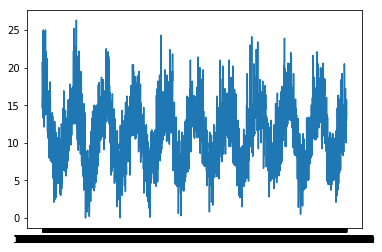

In [20]:
plt.plot(temp_df)

### Get representation of the distribution of data using histogram
- use hist() method

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

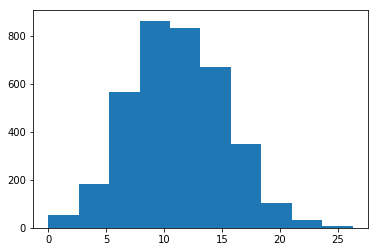

In [21]:
plt.hist(temp_df['Temperature'])

### Check minimum and maximum temperature
- use min() and max() methods

In [24]:
np.min(temp_df['Temperature'])

0.0

In [25]:
np.max(temp_df['Temperature'])

26.3

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [0]:
train_size = int(len(temp_df)*0.75)
test_size = len(temp_df) - train_size

In [42]:
train_size

2737

In [43]:
test_size

913

In [0]:
train_data = temp_df.iloc[0:train_size, :]
test_data = temp_df.iloc[test_size:len(temp_df), :]

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_df = scaler.fit_transform(train_data)
test_df = scaler.transform(test_data)

### Print scaled train and test data
- print only first 5 values

In [52]:
train_df[0:5,:]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [53]:
test_df[0:5,:]

array([[0.36121673],
       [0.27376426],
       [0.30798479],
       [0.30418251],
       [0.32319392]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
X_train,y_train = create_seq_data(train_df)
X_test, y_test = create_seq_data(test_df)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

### Print shape of data
- print shape of X_train and X_test

In [71]:
X_train.shape

(2736, 1, 1)

In [72]:
X_test.shape

(2736, 1, 1)

## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [73]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

look_back = 1
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


Using TensorFlow backend.


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

### summarize your model
- use summary() method

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [76]:
model.fit(X_train, y_train, batch_size=1, epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





2736/2736 [==============================] - 5s 2ms/step - loss: 0.0200
Epoch 2/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0147
Epoch 3/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0131
Epoch 4/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0121
Epoch 5/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0114
Epoch 6/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0113
Epoch 7/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0111
Epoch 8/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0113
Epoch 9/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0107
Epoch 10/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0105
Epoch 11/50
2736/2736 [==============================] - 4s 2ms/ste

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
trainPredict = model.predict(X_train, batch_size=1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])






### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])


### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
from sklearn.metrics import mean_squared_error
import math

In [0]:
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))

In [86]:
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 2.62 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))

In [88]:
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.56 RMSE
